# Used Car Price Prediction 2

This is a Supervised Machine Learning Problem where I'll be using  
+ Linear Regression
+ Decission Tree
+ Random Forest
Algorithm

###  Dataset Coloumn Description:
- **Name:** Brand and model name of the car
- **Location:** Location of the car
- **Year:** Manufactured year of the car
- **kilometers_Driven:** How much km has been driven by the car
- **Fuel_Type:** CNG/Diesl/Petrol/LPG/Electric
- **Transmission:** Manual/Automatic
- **Owner_Type:** First/second/Third/Fourth or above
- **Mileage:** Mileage of the car
- **Power:** Power of the car
- **Seats:** No of seats in the car
- **New_Price:** New price of the car
- **Price:** Price of the used car

#  The Program

In [1]:
#Importing useful libraries:
import pandas as pd #for data analysis
import numpy as np #provides powerful data structure
import seaborn as sns #for high-level Statistical data visualization
import matplotlib.pyplot as plt #for visualisation
%matplotlib inline
#to set the backend of matplotlib to the 'inline' backend

In [2]:
#load the data
car = pd.read_csv('C:/Users/Hp/Downloads/new_car_data.csv')
car.head(5) #it returns top 5 rows of the dataframe

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
#details  of our  data frame
car.shape

(6019, 14)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


### Cleaning data

In [5]:
#let's create a backup 
backup = car.copy()

In [6]:
#checking for null values
car.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
#removing null value from seats columns
car['Seats'].mode()

0    5.0
dtype: float64

In [8]:
car['Seats'].fillna(value = 5.0, inplace = True)

Mileage, Engine and power coloumnalso have null values but to remove them first we need to convert the datatype of these coloumns from object to numeric

In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              6019 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


Removing units from all the 3 colums data:


In [10]:
car['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [11]:
car['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [12]:
car['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [13]:
#removing kmpl and km/kg from mileage column
car['Mileage'] = car['Mileage'].apply(lambda x: str(x).replace('kmpl', '') if 'kmpl' in str(x) else str(x))
car['Mileage'] = car['Mileage'].apply(lambda x:str(x).replace('km/kg', '') if 'km/kg' in str(x) else str(x))#removing CC from engine column
car['Engine'] = car['Engine'].apply(lambda x: str(x).replace('CC', '') if 'CC' in str(x) else str(x))#removing bhp from power column
car['Power'] = car['Power'].apply(lambda x: str(x).replace('bhp', '') if 'bhp' in str(x) else str(x))

In [14]:
car['Mileage'].unique()

array(['26.6 ', '19.67 ', '18.2 ', '20.77 ', '15.2 ', '21.1 ', '23.08 ',
       '11.36 ', '20.54 ', '22.3 ', '21.56 ', '16.8 ', '25.2 ', '12.7 ',
       '0.0 ', '13.5 ', '25.8 ', '28.4 ', '20.45 ', '14.84 ', '22.69 ',
       '23.65 ', '13.53 ', '18.5 ', '14.4 ', '20.92 ', '17.5 ', '12.8 ',
       '19.01 ', '14.53 ', '11.18 ', '12.4 ', '16.09 ', '14.0 ', '24.3 ',
       '18.15 ', '11.74 ', '22.07 ', '19.7 ', '25.4 ', '25.32 ', '14.62 ',
       '14.28 ', '14.9 ', '11.25 ', '24.4 ', '16.55 ', '17.11 ', '22.9 ',
       '17.8 ', '18.9 ', '15.04 ', '25.17 ', '20.36 ', '13.29 ', '13.68 ',
       '20.0 ', '15.8 ', '25.0 ', '16.4 ', '24.52 ', '22.1 ', '8.5 ',
       '15.1 ', '16.95 ', '19.64 ', '16.5 ', '18.53 ', '17.57 ', '18.0 ',
       '23.2 ', '16.73 ', '17.0 ', '13.0 ', '17.68 ', '22.7 ', '16.2 ',
       '15.26 ', '23.0 ', '19.83 ', '14.94 ', '17.71 ', '14.74 ', '16.0 ',
       '22.32 ', '12.99 ', '23.3 ', '19.15 ', '10.8 ', '15.0 ', '22.0 ',
       '21.9 ', '12.05 ', '11.7 ', '21.21 ', '2

In [15]:
car['Engine'].unique()

array(['998 ', '1582 ', '1199 ', '1248 ', '1968 ', '814 ', '1461 ',
       '2755 ', '1598 ', '1462 ', '1497 ', '2179 ', '2477 ', '1498 ',
       '2143 ', '1995 ', '1984 ', '1197 ', '2494 ', '1798 ', '2696 ',
       '2698 ', '1061 ', '1198 ', '2987 ', '796 ', '624 ', '1999 ',
       '1991 ', '2694 ', '1120 ', '2498 ', '799 ', '2393 ', '1399 ',
       '1796 ', '2148 ', '1396 ', '1950 ', '4806 ', '1998 ', '1086 ',
       '1193 ', '2982 ', '1493 ', '2967 ', '2993 ', '1196 ', '1799 ',
       '2497 ', '2354 ', '1373 ', '2996 ', '1591 ', '2894 ', '5461 ',
       '1595 ', '936 ', '1997 ', 'nan', '1896 ', '1390 ', '1364 ',
       '2199 ', '993 ', '999 ', '1405 ', '2956 ', '1794 ', '995 ',
       '2496 ', '1599 ', '2400 ', '1495 ', '2523 ', '793 ', '4134 ',
       '1596 ', '1395 ', '2953 ', '1586 ', '2362 ', '1496 ', '1368 ',
       '1298 ', '1956 ', '1299 ', '3498 ', '2835 ', '1150 ', '3198 ',
       '1343 ', '1499 ', '1186 ', '1590 ', '2609 ', '2499 ', '2446 ',
       '1978 ', '2360 ', '3436 '

In [16]:
car['Power'].unique()

array(['58.16 ', '126.2 ', '88.7 ', '88.76 ', '140.8 ', '55.2 ', '63.1 ',
       '171.5 ', '103.6 ', '74 ', '103.25 ', '116.3 ', '187.7 ', '115 ',
       '175.56 ', '98.6 ', '83.8 ', '167.62 ', '190 ', '88.5 ', '177.01 ',
       '80 ', '67.1 ', '102 ', '108.45 ', '138.1 ', '184 ', '179.5 ',
       '103.5 ', '64 ', '82 ', '254.8 ', '73.9 ', '46.3 ', '37.5 ', '77 ',
       '82.9 ', '149.92 ', '138.03 ', '112.2 ', '163.7 ', '71 ', '105 ',
       '174.33 ', '75 ', '103.2 ', '53.3 ', '78.9 ', '147.6 ', '147.8 ',
       '68 ', '186 ', '170 ', '69 ', '140 ', '78 ', '194 ', '500 ',
       '108.5 ', '86.8 ', '187.74 ', 'null ', '132 ', '86.7 ', '73.94 ',
       '117.3 ', '218 ', '168.5 ', '89.84 ', '110 ', '90 ', '82.85 ',
       '67 ', '241.4 ', '35 ', '270.9 ', '126.32 ', '73 ', '130 ',
       '100.6 ', '150 ', '75.94 ', '215 ', '107.3 ', '37.48 ', '120 ',
       '178 ', '152 ', '91.1 ', '85.80 ', '362.07 ', '121.3 ', '143 ',
       '81.80 ', '171 ', '76.8 ', '103.52 ', '444 ', '362.9 ', '67.

In [17]:
car['Mileage'] = pd.to_numeric(car['Mileage'], errors='coerce')
car['Engine'] = pd.to_numeric(car['Engine'], errors='coerce')
car['Power'] = pd.to_numeric(car['Power'], errors='coerce')

Removing null values from these 3 columns:

In [18]:
car['Mileage'].mode()

0    17.0
dtype: float64

In [19]:
car['Mileage'].fillna(value=17.0,inplace=True)

In [20]:
car['Engine'].mode()

0    1197.0
dtype: float64

In [21]:
car['Engine'].fillna(value=1197.0,inplace=True)

In [22]:
car['Power'].mode()

0    74.0
dtype: float64

In [23]:
car['Power'].fillna(value = 74.0, inplace = True)

Now we have null value only in New_Price column:

In [24]:
car.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

Sincethe New_Price has so many null values, we will not use this column for prediction

### Feature Engineering:
Adding a new column in our data frame.
Checking for unique values in the ‘Name’ column:

In [25]:
car['Name'].nunique() #returns the number of unique elements

1876

The ‘Name’ column has so many values so we will separate the brand names from the column and create a new column ‘Brand_Name’.

In [26]:
car['Brand_Name'] = car['Name'].str.split(' ').str[0]
car.groupby('Brand_Name').nunique()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand_Name
Brand_Name,,,,,,,,,,,,,,,
Ambassador,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
Audi,236,69,11,12,180,2,1,3,38,11,29,5,19,166,1
BMW,267,87,11,14,190,2,1,3,46,9,26,4,30,182,1
Bentley,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
Chevrolet,121,43,11,15,107,2,2,3,25,11,25,6,0,80,1
Datsun,13,9,7,3,12,1,1,1,5,2,4,2,6,12,1
Fiat,28,20,9,11,26,2,1,3,12,5,13,1,1,23,1
Force,3,2,2,1,2,1,1,1,1,2,2,1,0,2,1
Ford,300,114,11,17,237,2,2,4,40,16,33,3,21,178,1


Unique values of new column ‘Brand_Name’

In [27]:
car['Brand_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [28]:
#merging Isuzu and ISUZU
car.Brand_Name[car.Brand_Name=='Isuzu']='ISUZU'

<ipython-input-28-e0995657d9a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.Brand_Name[car.Brand_Name=='Isuzu']='ISUZU'


Creating a new data frame that we will use for analysis:

In [29]:
#dropping the Name ,Location and new_price column
car_df=car.drop(["Name","Location","New_Price"],axis='columns')

In [30]:
car_df.head(5)

,Unnamed: 0,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


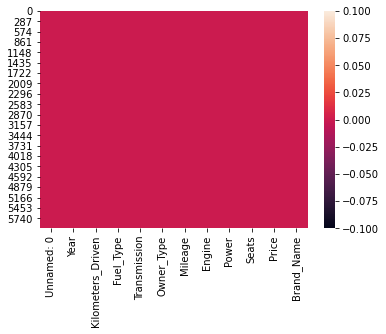

In [31]:
#Visualising whether our data has null values or not
sns.heatmap(car_df.isnull())
plt.show()

## Data Analysis:

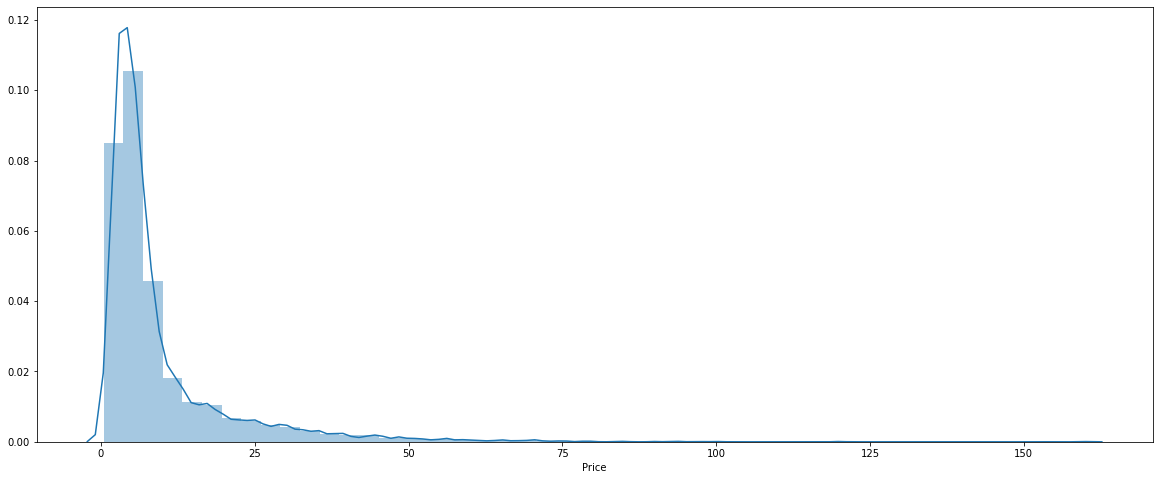

In [32]:
plt.figure(figsize=(20,8))
sns.distplot(car_df['Price'])

### Analysis with respect to the number of cars:

###### Brand_Name vs Car count

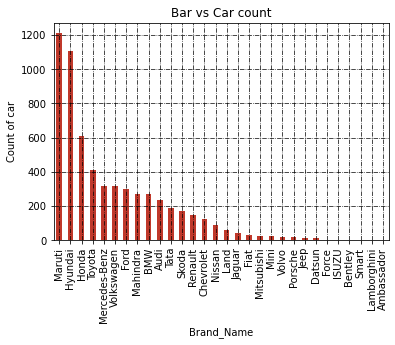

In [33]:
plt.xlabel('Brand_Name')
plt.ylabel('Count of car')
car_df['Brand_Name'].value_counts().plot(kind='bar',title='Bar vs Car count', color = '#C0392B')
plt.grid(color='black',linestyle='-.', linewidth = 0.7)

###### Year vs Car Count:

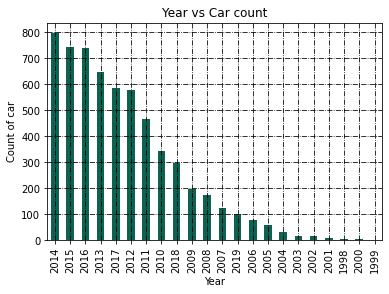

In [34]:
plt.xlabel('Year')
plt.ylabel('Count of car')
car_df['Year'].value_counts().plot(kind='bar',title='Year vs Car count', color = '#0E6251')
plt.grid(color='black',linestyle='-.',linewidth=0.8)

###### Analysis of other features with respect to car count.

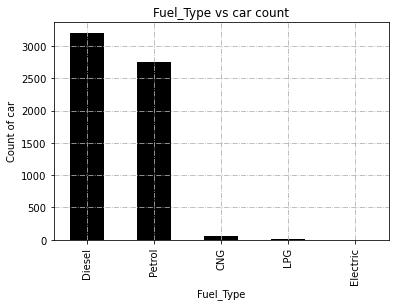

In [35]:
#fuel-type
plt.xlabel("Fuel_Type")
plt.ylabel("Count of car")
car_df['Fuel_Type'].value_counts().plot(kind='bar', title='Fuel_Type vs car count',color='black')
plt.grid(linestyle='-.')


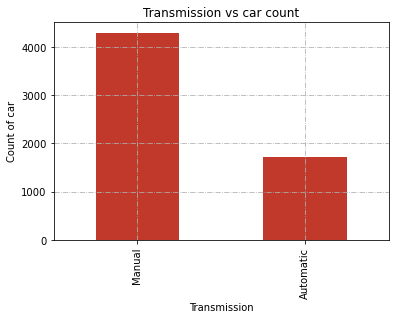

In [36]:
#Transmission
plt.xlabel("Transmission")
plt.ylabel("Count of car")
car_df['Transmission'].value_counts().plot(kind='bar',title='Transmission vs car count',color='#C0392B')
plt.grid(linestyle='-.')


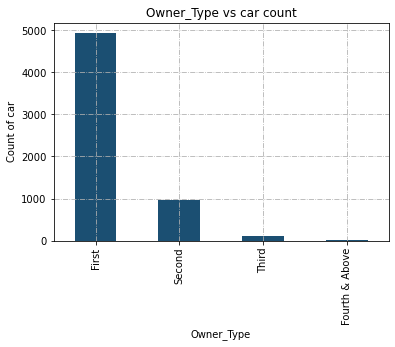

In [37]:
#owner type
plt.xlabel("Owner_Type")
plt.ylabel("Count of car")
car_df['Owner_Type'].value_counts().plot(kind='bar',title='Owner_Type vs car count',color='#1B4F72')
plt.grid(linestyle='-.')


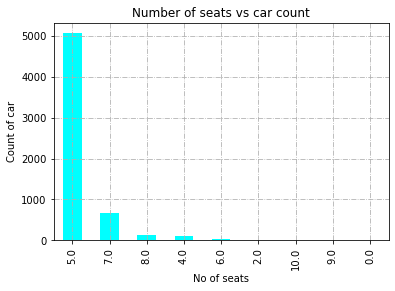

In [38]:
#seats
plt.xlabel("No of seats")
plt.ylabel("Count of car")
car_df['Seats'].value_counts().plot(kind='bar',title='Number of seats vs car count',color='cyan')
plt.grid(linestyle='-.')

###### Conclusion of the above features :

   - Maximum cars are of petrol and diesel type.
   - Manual cars are more than Automatic cars.
   - First-hand cars are maximum followed by second.
   - Cars with 5 seats are dominant.

###### Analysis with respect to Price:

Brand_Name vs Price:

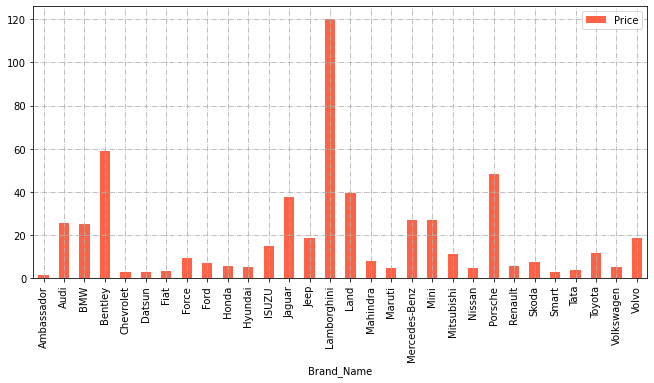

In [39]:
BrandVsPrice = pd.DataFrame(car_df.groupby('Brand_Name')['Price'].mean())
BrandVsPrice.plot.bar(color='tomato',figsize=(11,5))
plt.grid(linestyle='-.')
plt.show()

In [40]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6019 non-null   float64
 7   Engine             6019 non-null   float64
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   float64
 10  Price              6019 non-null   float64
 11  Brand_Name         6019 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 564.4+ KB


###### Analysis of other features with respect to Price:

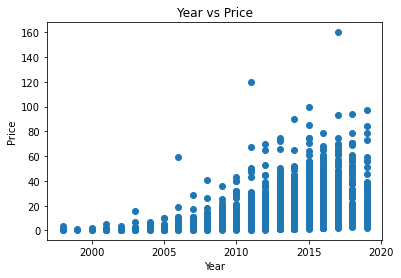

In [41]:
#year vs price
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.scatter(car_df.Year,car_df.Price)

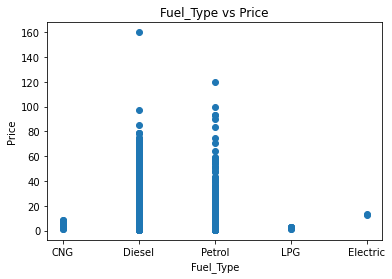

In [42]:
#fuel type vs price
plt.title("Fuel_Type vs Price")
plt.xlabel("Fuel_Type")
plt.ylabel("Price")
plt.scatter(car_df.Fuel_Type,car_df.Price)


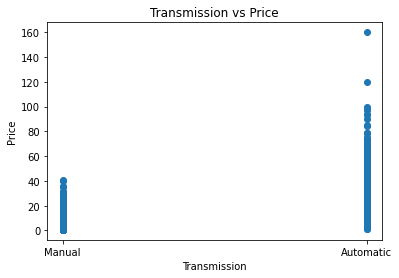

In [43]:
#transmission vs price
plt.title("Transmission vs Price")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.scatter(car_df.Transmission,car_df.Price)


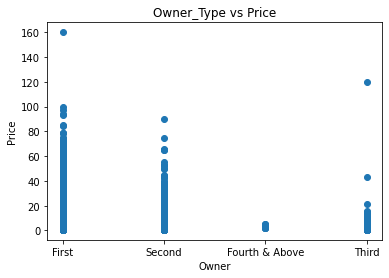

In [44]:
#owner type vs price
plt.title("Owner_Type vs Price")
plt.xlabel("Owner")
plt.ylabel("Price")
plt.scatter(car_df.Owner_Type,car_df.Price)

###### Conclusion of the above features :

   - Cars ranging between the years 2012 to 2020 cost more.
   - Petrol and diesel cars are costly.
   - Automatic cars cost more than manual cars.
   - First-hand cars are costly followed by second-hand.

###### Engine and Power vs Price:

Text(0.5, 1.0, 'Engine vs Price')

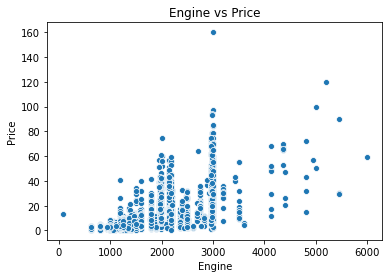

In [45]:
sns.scatterplot(data=car_df, x='Engine', y='Price').set_title('Engine vs Price')

Text(0.5, 1.0, 'Power vs Price')

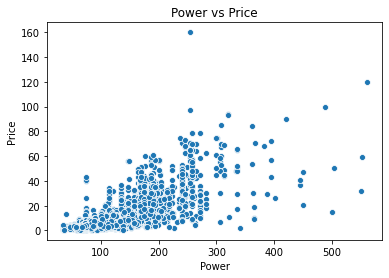

In [46]:
sns.scatterplot(data=car_df, x='Power', y='Price').set_title('Power vs Price')

Both engine cc and power affect the price of a car

###### Removing outlier:

The relation between price and km drove:

Text(0.5, 1.0, 'Kilometers_Driven vs Price')

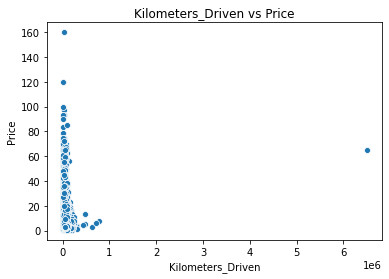

In [47]:
sns.scatterplot(data=car_df, x='Kilometers_Driven', y='Price').set_title('Kilometers_Driven vs Price')

one of the cars has km drove more than 6500000, this is an outlier and we need to remove it

In [48]:
#removing outlier
car_df.drop(car_df[car_df['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)

###### The relation of Mileage and Seats with Price:

Text(0.5, 1.0, 'Mileage vs Price')

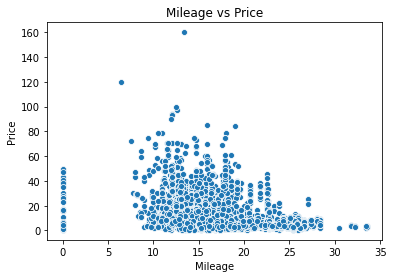

In [49]:
sns.scatterplot(data=car_df, x='Mileage', y='Price').set_title('Mileage vs Price')

Text(0.5, 1.0, 'Seats vs Price')

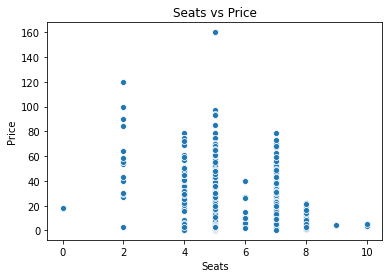

In [50]:
sns.scatterplot(data=car_df, x='Seats', y='Price').set_title('Seats vs Price')

Some rows have zero values in mileage and seats columns.
Counting no of rows with zero values in Mileage and Seats column :

In [51]:
car_df.isin([0]).sum()

Unnamed: 0            1
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              68
Engine                0
Power                 0
Seats                 1
Price                 0
Brand_Name            0
dtype: int64

Dropping 1 row from Seats column with zero value:

In [52]:
car_df.drop(car_df[car_df['Seats']==0].index,axis=0,inplace=True)

Cannot drop rows with zero value in the mileage column otherwise, we will lose 68 rows, which will result in the loss of large data. Hence replacing the zero values with mode value:

In [53]:
#we have already calculated the mode of milage column for filling #null values which is 17.0
car_df["Mileage"].replace({0.0:17.0 },inplace=True)

In [54]:
#dropping the extra column
del car_df['Unnamed: 0']


In [55]:
car_df.head(5)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [56]:
car_df.isin([0]).sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand_Name           0
dtype: int64

## Handling categorical Columns


In [57]:
#creating a new dataframe 
car_df1 = car_df.copy()

Fuel_Type ,Transmission,Owner_type,and Brand_Name are categorical columns:

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

In [59]:
le_Fuel_Type=LabelEncoder()
le_Transmission=LabelEncoder()
le_Owner_Type=LabelEncoder()
le_Brand_Name=LabelEncoder()
car_df1['Fuel_Type_n']= le_Fuel_Type.fit_transform(car_df1['Fuel_Type'])
car_df1['Transmission_n']=le_Transmission.fit_transform(car_df1['Transmission'])
car_df1['Owner_Type_n']=le_Owner_Type.fit_transform(car_df1['Owner_Type'])
car_df1['Brand_Name_n']=le_Brand_Name.fit_transform(car_df1['Brand_Name'])

In [60]:
car_df1.head(1)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,Fuel_Type_n,Transmission_n,Owner_Type_n,Brand_Name_n
0,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,1.75,Maruti,0,1,0,17


Dropping columns with data type object:

In [61]:
car_df2=car_df1.drop(["Fuel_Type","Transmission","Owner_Type","Brand_Name"],axis='columns')


In [62]:
# ohe = OneHotEncoder()
# ohe.fit(car_df[['Fuel_Type','Transmission','Owner_Type','Brand_Name']])


In [63]:
car_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6017 non-null   int64  
 1   Kilometers_Driven  6017 non-null   int64  
 2   Mileage            6017 non-null   float64
 3   Engine             6017 non-null   float64
 4   Power              6017 non-null   float64
 5   Seats              6017 non-null   float64
 6   Price              6017 non-null   float64
 7   Fuel_Type_n        6017 non-null   int32  
 8   Transmission_n     6017 non-null   int32  
 9   Owner_Type_n       6017 non-null   int32  
 10  Brand_Name_n       6017 non-null   int32  
dtypes: float64(5), int32(4), int64(2)
memory usage: 470.1 KB


In [64]:
# column_trans = make_column_transformer((OneHotEncoder(),['Fuel_Type','Transmission','Owner_Type','Brand_Name']),
#                                       remainder='passthrough')

In [65]:
#Shuffling the columns as per our need
car_df1=car_df1[['Brand_Name_n','Year','Kilometers_Driven','Fuel_Type_n','Transmission_n','Owner_Type_n','Mileage','Engine','Power','Seats','Price']]

## Correlation matrix

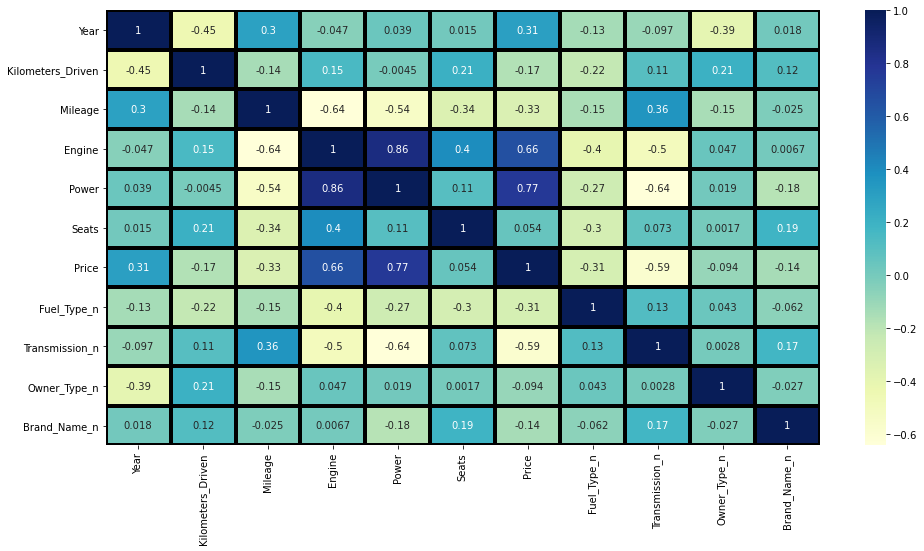

In [66]:
corrMatrix = car_df2.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corrMatrix, annot=True,cmap= 'YlGnBu', linewidths=3, linecolor='black')
plt.show()

creating 2 new data frames:

In [67]:
car_df2_inputs = car_df2.drop(['Price'],axis='columns')
car_df2_target = car_df2['Price']

In [68]:
car_df2_inputs.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_n,Transmission_n,Owner_Type_n,Brand_Name_n
0,2010,72000,26.60,998.0,58.16,5.0,0,1,0,17
1,2015,41000,19.67,1582.0,126.20,5.0,1,1,0,10
2,2011,46000,18.20,1199.0,88.70,5.0,4,1,0,9
3,2012,87000,20.77,1248.0,88.76,7.0,1,1,0,17
4,2013,40670,15.20,1968.0,140.80,5.0,1,0,2,1


In [69]:
car_df2_target.head(5)

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

‘car_df1_inputs’ data frame has input features and ‘car_df1_target’ data frame has the target value that we need to predict i.e price

__Now let us see which features are the most and least important for predicting the price of a used car:__

In [70]:
car_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6017 non-null   int64  
 1   Kilometers_Driven  6017 non-null   int64  
 2   Mileage            6017 non-null   float64
 3   Engine             6017 non-null   float64
 4   Power              6017 non-null   float64
 5   Seats              6017 non-null   float64
 6   Price              6017 non-null   float64
 7   Fuel_Type_n        6017 non-null   int32  
 8   Transmission_n     6017 non-null   int32  
 9   Owner_Type_n       6017 non-null   int32  
 10  Brand_Name_n       6017 non-null   int32  
dtypes: float64(5), int32(4), int64(2)
memory usage: 470.1 KB


In [71]:
car_df.isin([0]).sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand_Name           0
dtype: int64

In [72]:
from sklearn.ensemble import ExtraTreesRegressor

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(car_df2_inputs,car_df2_target)
#use inbuilt class feature_importances of ExtraTreeRegressor
#plot graph of feature importances for better visualization


ExtraTreesRegressor()

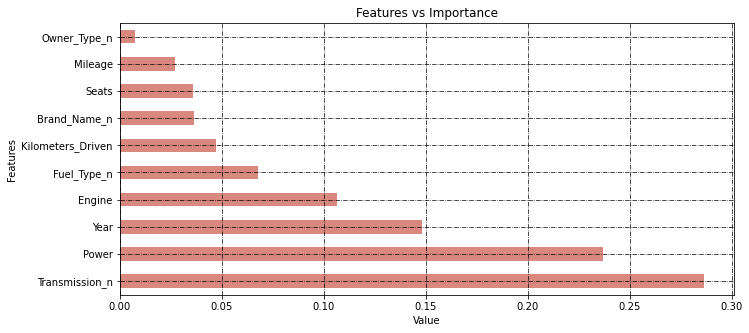

In [74]:
feat_importances = pd.Series(model.feature_importances_, index=car_df2_inputs.columns)
plt.figure(figsize=(11,5))
plt.xlabel("Value")
plt.ylabel("Features")
plt.title("Features vs Importance")
feat_importances.nlargest(10).plot(kind='barh',color='#D98880')##45B39D
plt.grid(color='black', linestyle='-.', linewidth=0.7)
plt.show()

In [75]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [77]:
def find_best_model_using_gridsearchcv(car_df2_inputs,car_df2_target):
    algos = {
        'linear_regression' : {
            'model': linear_model.LinearRegression(),
            'params': {
                'normalize': [True, False]
        
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'max_features': ['auto', 'sqrt'],
                'n_estimators': [50,60]
           }}}
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(car_df2_inputs,car_df2_target)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
result=find_best_model_using_gridsearchcv(car_df2_inputs,car_df2_target)
result

,model,best_score,best_params
0,linear_regression,0.674731,{'normalize': True}
1,decision_tree,0.805887,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,Random_forest,0.868007,"{'max_features': 'sqrt', 'n_estimators': 60}"


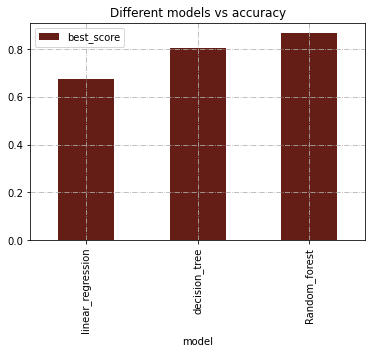

In [78]:
result_map=result.drop(['best_params'],axis='columns')
result_map.plot(x="model",y='best_score',kind='bar',color='#641E16',title='Different models vs accuracy')
plt.grid(linestyle='-.')

Splitting the data frame for training it on the random forest model :

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(car_df2_inputs,car_df2_target,test_size=0.2,random_state=10)

In [80]:
len(x_train)

4813

In [81]:
len(x_test)

1204

###### Since Random Forest is giving us the highest accuracy, we will use it

In [82]:
#Training model with the best parameters
model_RandomForest = RandomForestRegressor(max_features='sqrt',bootstrap='True')

In [83]:
model_RandomForest.fit(x_train,y_train)

RandomForestRegressor(bootstrap='True', max_features='sqrt')

In [84]:
model_RandomForest.score(x_test,y_test)

0.9166284389428021

###### Now it's time to import the model in a file:

In [85]:
#for that we weill use pickle module
import pickle

In [86]:
#writing the model in file
pickle.dump(model_RandomForest,open('RFmodel.pkl','wb'))

In [87]:
#reading the file
RFmodel=pickle.load(open('RFmodel.pkl','rb'))

## Testing the Model

In [88]:
RFmodel.predict([[17,2013,100000,15,1000,40,5.0,3,1,0]])

array([22.5667])

In [89]:
RFmodel.predict([[60,2017,22000,13.68,2393,147.8,8.0,2,1,0]])

array([22.5667])

__The car will cost 22.5 lakh__

In the above prediction:

- 17- Maruti(Brand_Name)
- 2013(year)
- 100000(KM drove)
- 15(mileage)
- 1000(cc)
- 40(power)
- 5.0-no of seats
- 3-Petrol
- 1-Manual
- 0-first hand